# Quantum Supply Chain Manager

The quantum supply chain manager is a quantum solution for logistics problems. We use the power of quantum machine learning for product [backorder](https://www.investopedia.com/terms/b/backorder.asp) prediction and quantum optimization for finding the best route to pick those products with high demand to store them in strategic warehouses. With the first technique, our clients can be prepared for increasing the production of their products when they are in high demand. Once we have established a set of products needed during a period of time, we use our second solution, the vehicle routing problem (VRP) solution to find the optimal route for picking these products. This reduces considerably costs associated with logistics, transportation, backorders, and overstocking for our clients. In summary, these solutions will improve business in terms of client satisfaction, backorder and shipping transportation costs.

<img src="./Images/QSCM.png" width=900>

### But, why this is important?

Mainly, backorders indicate that the demand for a specific product was not well understood at a certain point in time and needs to be reevaluated. This has a high impact on the customers' loyalty and the company revenue. The solution to this problem must be increasing the production of the products with a high probability of backorder before that happen avoiding overstocking them which may result in high inventory costs. Using quantum neural networks (QNN), we can improve the predictability, the training size, and the number of variables for the backorder predictions.

On the other hand, the VRP finds optimal solutions for picking products in terms of costs and time. The benefit of finding an optimal solution can represent a saving of up to 30% of the costs associated with transportation [1]. However, current techniques deal with up to 400 variables in a reasonable time. Soon with a growing e-market, the capabilities of such models will be overcome. In the near future, we will need systems able to solve thousands of variables in small periods of time.

### Is this something that we cannot do with classical computation?

The short answer is "depends", we can rely on the power of classical computation and heuristic methods to solve such a problem at **small scale**. At this moment, classical algorithms have the capacity of working with hundreds of variables to solve the VRP in a couple of minutes with a good quality compared with the best-known solutions (BKS) [2]. This means in small scenarios, this is a viable solution. However, as the e-market is expanding worldwide the requirement will be that of solving thousands of variables with good quality and in a reasonable time. The increment in variables number has a tendency to increase exponentially the time required to solve these problems on classical computers. This is an aspect that quantum computers can overcome, encoding large problems in a reasonable time and solving them much faster with quantum algorithms such as the quantum approximate optimization algorithm (QAOA).

We foresee a future where quantum computers will reduce largely the costs associated with storage and transportation at a big scale thanks to the combination of forecasting backorders and route optimization.

## Proof of Concept

To show the applicability of our concept, we have used real data of some products in the [dataset backorder](https://github.com/akhiilkasare/Back-Order-Prediction-iNeuron). The dataset contains 23 variables including:

|     |     |     | | | |
| --- | --- | --- | - | - | - |
| **sku** Product ID | **national_inv** Current inventory level for the part |**lead_time** Transit time for product | **in_transit_qty** Amount of product in transit from source|**forecast_3_month** Forecast sales for the next 3 months | **forecast_6_month** Forecast sales for the next 6 months|
|**forecast_9_month** Forecast sales for the next 9 months|**sales_1_month** Sales quantity for the prior 1 month time period|**sales_3_month** Sales quantity for the prior 3 month time period |**sales_6_month** Sales quantity for the prior 6 month time period |**sales_9_month** Sales quantity for the prior 9 month time period |**min_bank** Minimum recommend amount to stock
|**potential_issue** Source issue for part identified |**pieces_past_due** Parts overdue from source |**perf_6_month_avg** Source performance for prior 6 month period |**perf_12_month_avg** Source performance for prior 12 month period |**local_bo_qty** Amount of stock orders overdue|**deck_risk** Part risk flag
|**oe_constraint** Part risk flag | **ppap_risk** Part risk flag | **stop_auto_buy** Part risk flag | **rev_stop** Part risk flag| **went_on_backorder** – Product actually went on backorder. <font color='green'>This is the target value</font>.


The dataset contains 1687861 products of some companies with a portion of 11293 that went backorder. We take 2000 cases equally distributed between <font color='green'>True</font> and <font color='red'>False</font> backorders from the dataset to do the training of our QNN. Once, we can predict if a product is backorder we select a small dataset of backorder products to make an optimization using the VRP with QAOA and VQE to select the optimal route. The comparison of the VRP results are contrasted with those of [docplex](https://pypi.org/project/docplex/) a classical optimizer.

# Outline

1. Backorder prediction using a QNN

    1.1 Setting the problem
    1.2 The Ansatz encoding
    1.3 Different ansatz solutions

2. Vehicle routing problem solution.

    2.1 Setting the problem
    2.2 The QUBO representation of the vehicle routing problem
    
        2.2.1 Classical solution of the QUBO model
        2.2.2 Quantum Solution of the QUBO model
3. Conclusion and Future Work


4. References

# 1. Backorder Prediction

This is about an order that cannot be fulfilled at a given time because there is not enough inventory or the item is out of stock, but you can guarantee delivery of the product in the future. Unlike the out-of-stock situation, in the backorder situation customers can purchase the items and place the order as they will be guaranteed a delivery in the future, i.e., it is an order with a delayed delivery date.

## 1.1 Setting the problem

- From the dataset of backorders, we analyze different size data model with a special case with 2000 sampes for training and 6159 for validation. This will simulate a case were a lack of results is presented.

- Once the dataset is selected, 3 ansatz architectures for the QNN are analized multiscale entanglement renormalization ansatz (MERA) [3], tree tensor networks TTN [4], and matrix product state (MPS) [5].

- Next, the results of the QNN are compared against a classical neural network.

## 1.2 The ansatz encoding

For the quantum computing case, the following scheme is generated for each experiment and it has 3 different ansatz based on 3 tensor networks (TN) MERA, TTN, and MPS. With  only 10 variables we designed the amplitud embedding an one layer for each TN. The figure below shows the different ansatz choosed for the prediction of backorder.

<img src="./Images/tensor.png" width=800>

## 1.3 Different ansatz solutions

For the three different ansatzes presented in Sec 1.2, different architectures were tested. For the case of the MERA architecture 5 different architectures were trained, 1 Layer, 2 Layers, 4 Layers, 1 Layer with a standard scaler, and 1 layer with depolarizing noise of 0.2. For the case of MPS and TTN the architectures tested were 1 layer, 2 layers, and 4 layers. The results were compared against a classical neural network with 640 parameters. From all the architectures tested the best result was obtained with MERA and 1 layer. This architecture outperforms the best result with a classical neural network in almost all the different metrics presented in the table below. Most important, MERA 1 layer is able to reduce false positives which can result in overstocking. Another good point is that even with some noise the 1 layer model is able to give good results in terms of prediction as is shown in the confusion matrices shown below.

<img src="./Images/Results-Ansatz.png" width=800>



# 2. Vehicle routing problem Solution

Once we have the solution of the backorders predictions, we select some of them to do an optimization of the best route giving a set of *K* trucks using the Vehicle routing problem (VRP)


## 2.1 Setting the problem

- We take a subset of 10 companies that were predicted to have backorder of some products.
- From the warehouse, where we collect all the products, and each company there is always a connection.
- 3 trucks are chosen to collect the products.
- Connections between companies are selected if the Euclidian distance is less than a threshold

<img src="./Images/SettingTheProblem.png" width=800>

## 2.2 The QUBO representation of the vehicle routing problem

To encode a problem as the Vehicle Routing Problem on a quantum computer it is needed to represent it as a quadratic unconstrained binary optimization ([QUBO](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization)) problem. In the QUBO representation, the cost function has linear and cuadratic terms and the constrains of the objective function are added as penalization to the cost function. The following function. In the Figure below, we are showing the objective function of the VRP:

<img src="./Images/CostFunc.png" width=800>

The terms of the above equations are:
<div class="alert alert-block alert-success">
    
- C<sub>ij</sub> : We consider the cost associated with a specific route ij as a combination of distance, traffic, and other forecasted terms related to the disadvantages of taking the particular route on a specific day.

- K: We find the solution for 3 trucks.
</div>

### 2.2.1 Classical solution of the QUBO model

Using docplex, the python version of the optimization solver **cplex**, we obtain the result of the problem explained above. The Figure below shows the graph representation of the solution, where the edges observed are the connections between companies that minimize the cost function and satisfy all the constraints. This solution will be used in the rest of the notebook as the optimal solution.

<img src="./Images/OptimalSolution.png" width=400>

### 2.2.2 Quantum Solution of the QUBO model

Once we have the quadratic program of our model. We can use the qiskit optimization library to translate it into its QUBO representation. In this case, we have inequality constraints that in most cases need extra variables, known as **slack variables**. For this specific case, the number of variables increases from  68 to 196 to represent the inequality constraints.

A further constraint is the number of qubits we can simulate. Unless we have a supercomputer, the best option to simulate programos with more than 20 qubits is using **qasm_simulator** from IBM in **runtime mode**. The maximum number of qubits we can simulate using the qasm_simulator is 32. For the case of real devices, we have a similar problem, we can only run experiments on a 7 qubits device (ibm_oslo, ibm_lagos) to which we have access.

Therefore, using the previous solution we can reduce the number of variables choosing the optimal solution for the **slack variables**. For the variables that represent the routes of company i to company j we select the optimal for some of them and leave the quantum computer find the optimal solution for the rest in two cases:

1) Using 7 variables and replace the orhers with the optimal solution. From the 7 variables left, 3 have a optimal solution equal to 1 and 4 equal to 0 (testing local machine and ibm_lagos **runtime**).

2) Using 15 variables and replace the others with the optimal solution. From the variables left 5 have a optimal solution equal to 1 and 10 equal to 0 (testing qasm_simulator **runtime**).

<img src="./Images/ProblemSolutions.png" width=600>

#### 7 Qubits Results

We tested different models to see the applicability of the current model with ideal solutions using two classical optimizer ([SPSA](https://en.wikipedia.org/wiki/Simultaneous_perturbation_stochastic_approximation) and [COBYLA](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html#:~:text=COBYLA%20is%20a%20numerical%20optimization,scipy.optimize.minimize%20COBYLA.)) for two quantum algorithms ([QAOA](https://qiskit.org/textbook/ch-applications/qaoa.html) with 2 layer repetitions and [VQE](https://pennylane.ai/qml/demos/tutorial_vqe.html) with ansatz [TwoLocal](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html), number of shots=1024 for both cases). Additionally, we run our model in *ibm_lagos* using [qiskit runtime](https://quantum-computing.ibm.com/lab/docs/iql/runtime/) with mitigated and unmitigated results with the same settings. The figure below shows the results for the different cases, we see that all the simulations reach the ideal solution shown in the graphs on the left, while the solution for the ibm_oslo and ibm_lagos experiments using COBYLA tries to go to the optimal solution, even though the noise is affecting them (Further experiments are needed to draw conclusion because at this point the max iterations were kept small).

<img src="./Images/Sol7Qprint2.png" width=1000>

#### 15 Qubits Results

For the case of 15 qubits, the solution includes only QAOA (with 3 layers repetitions) and VQE (with [TwoLocal ansatz](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html)) with the classic optimizer COBYLA. The results were obtained from qiskit runtime and the ideal simulator ibmq_qasm_simulator. As it is shown in the figure below the QAOA algorithm does not reach the solution while VQE can reach the solution.

<img src="./Images/Sol15Q.png" width=1000>

# 3. Conclusion and Future Work


# 3.2 Technical conclusions

- The current devices as *ibm_lagos* is still too noisy to get back correct results with real devices for a 7 qubits problem using VQE.

- It is important for the QUBO representation to choose a good penalty parameter when converting from a docplex model. The default penalty multiplier (similar to the Lagrange multiplier) for the equality and inequality constraints makes the penalty too large compared with the objective function. Therefore, the solver will lose soon the optimal direction. We have to set the penalty manually with a value of 15.

- When planning for the objectives of this project. We wanted to make a simulation of the QAOA with 25 qubits, 3 repetitions, and COBYLA optimizer with max iterations of 100 using ibmq_qasm_simulator. Soon we realized we were overoptimistic. The maximum time we can simulate continuously in runtime mode is  14400 seconds and an iteration using COBYLA, 1 repetition of the QAOA and 20 qubits takes 700 seconds. Therefore, we have technically 20 iterations with that setting. We decided to downgrade our model to work with 15 qubits, 2 repetitions, and 100 max iterations.


# 4. References

[1] Psaraftis, H.N. (1988). Vehicle Routing: Methods and Studies. 16: 223–248.

[2] Tan, S., & Yeh, W. (2021). applied sciences The Vehicle Routing Problem : State-of-the-Art Classification and Review. Applied Sciences, 11.

[3] Cong, I., Choi, S., & Lukin, M. D. (2019). Quantum convolutional neural networks. Nature Physics, 15(12), 1273–1278.

[4] Cheng, S., Wang, L., Xiang, T., & Zhang, P. (2019). Tree tensor networks for generative modeling. Physical Review B, 99(15), 1–10. https://doi.org/10.1103/PhysRevB.99.155131

[5] Ran, S. J. (2020). Encoding of matrix product states into quantum circuits of one- A nd two-qubit gates. Physical Review A, 101(3), 1–7. https://doi.org/10.1103/PhysRevA.101.032310

#### Required libraries

In [1]:
pip install qiskit qiskit-aer

In [2]:
#%pip install qiskit
%pip install docplex
%pip install qiskit_optimization
%pip install networkx
%pip install geopandas
%pip install folium

In [3]:
pip show qiskit


Name: qiskit
Version: 0.44.1
Summary: Software for developing quantum computing programs
Home-page: https://qiskit.org/
Author: Qiskit Development Team
Author-email: hello@qiskit.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: qiskit-terra
Required-by: 


In [4]:
import networkx as nx
import geopandas as gpd
import folium

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import time
import random
from IPython.display import display

from qiskit import IBMQ
from qiskit.algorithms import QAOA, VQE
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.optimizers import COBYLA, SPSA # Classical simulator
from qiskit.providers.aer import AerSimulator

from docplex.mp.model import Model
from qiskit_optimization.runtime import QAOAClient, VQEClient
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.algorithms import CplexOptimizer, MinimumEigenOptimizer

<ipython-input-4-7f5af9e18f29>:14: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import QAOA, VQE


## Setting the problem

- We take a subset of 10 companies that were predicted to have backorder of some products.
- From the warehouse, where we collect all the products, and each company there is always a connection.
- 3 trucks are chosen to collect the products.
- Connections between companies were selected randomly to get an additional of 14 connections.
- In terms of quantum computing resources this means 29 qubits because each connection means a qubit.


In [5]:
path = gpd.datasets.get_path('nybb')
df = gpd.read_file(path)

<ipython-input-5-4ddaa191f056>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  path = gpd.datasets.get_path('nybb')


### Visualization on the map of the different companies from where we will be collecting the products

In [6]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, max_zoom=12, tiles='CartoDB positron')

# Project to NAD83 projected crs
df = df.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
df['centroid'] = df.centroid

# Project to WGS84 geographic crs

# geometry (active) column
df = df.to_crs(epsg=4326)

# Centroid column
df['centroid'] = df['centroid'].to_crs(epsg=4326)

np.random.seed(7)
locations = []
ids = 0
for _, r in df.iterrows():
    lat, lon = r['centroid'].y, r['centroid'].x
    for i in range(2):
        lat_rand, lon_rand = lat + 0.2 * np.random.rand(), lon +0.1 * np.random.rand()
        locations.append((lon_rand, lat_rand))
        folium.Marker(location=[lat_rand, lon_rand], popup=f'Id: {ids}').add_to(m)
        ids += 1
center = np.array(locations).mean(axis=0)
locations = [(center[0], center[1])] + locations
folium.CircleMarker(location=[center[1], center[0]], radius=10, popup="<stong>Warehouse</stong>",
                    color="red",fill=True, fillOpacity=1, fillColor="tab:red").add_to(m)
m

In [7]:
# Normalizing the results to produce a graph in Graphx
companies = np.array(locations)
companies -= companies[0]
companies /= (np.max(np.abs(companies), axis=0))
r = list(np.sqrt(np.sum(companies ** 2, axis=1)))

<ipython-input-8-8f516c0d72ef>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap("coolwarm")(x) for x in r[1:]]


The number of edges of this problem is: 34


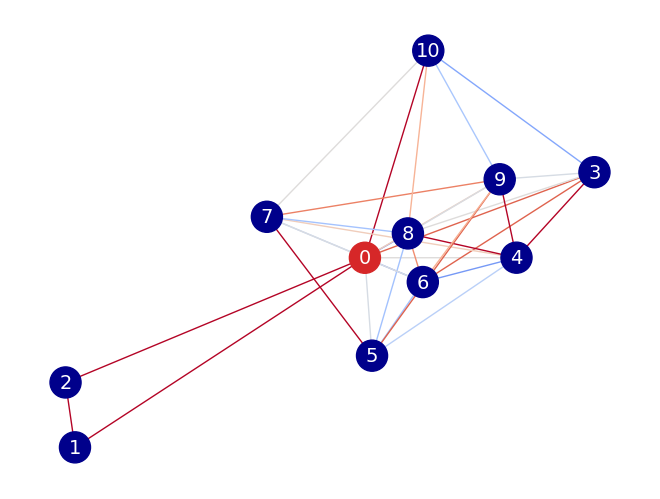

In [8]:
threshold = 1 # Limit for to not consider the route from company i to j if the distance is larger than a threshold
n_companies = len(companies)
G = nx.Graph(name="VRP")
G.add_nodes_from(range(n_companies))
# G.add_weighted_edges_from([0, i, w] for i, w in zip(range(1, n_companies), r[1:]))
np.random.seed(2)
count = 0
for i in range(n_companies):
    for j in range(n_companies):
        if i != j:
            rij = np.sqrt(np.sum((companies[i] - companies[j])**2))
            if (rij < threshold) or (0 in [i, j]):
                count +=1
                G.add_weighted_edges_from([[i, j, rij]])
                r.append(rij)
colors = [plt.cm.get_cmap("coolwarm")(x) for x in r[1:]]
nx.draw(G, pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])
print(f"The number of edges of this problem is: {len(G.edges)}")

### The QUBO of the vehicle routing problem

To encode a problem as the Vehicle Routing Problem on a quantum computer it is needed to represent it as a quadratic unconstrained binary optimization (QUBO) problem. In the QUBO representation, the cost function has linear and cuadratic terms and the constrains are added as penalization to the cost function. The following function. In the Figure below, we are showing the objective function of the VRP:

<img src="./Images/CostFunc.png" width=800>

The terms of the above equations are:
<div class="alert alert-block alert-success">
    
- C<sub>ij</sub> : We consider the cost associated with a specific route ij as a combination of distance, traffic, and other forecasted terms related to the disadvantages of taking the particular route on a specific day.

- K: We find the solution for 2 trucks.
</div>

In [9]:
mdl = Model(name="VRP")
n_trucks = 3 # number of K trucks
x = {}
for i, j in G.edges():
    x[(i, j)] = mdl.binary_var(name=f"x_{i}_{j}") # Adding route from company i to company j as a binary variable
    x[(j, i)] = mdl.binary_var(name=f"x_{j}_{i}") # Adding route from company j to company i as a binary variable

print(f"The number of qubits needed to solve the problem is: {mdl.number_of_binary_variables}")
cost_func = mdl.sum(w["weight"] * x[(i, j)] for i, j, w in G.edges(data=True)) + mdl.sum(w["weight"] * x[(j, i)] for i, j, w in G.edges(data=True))
mdl.minimize(cost_func)

# Constraint 1a(yellow Fig. above): Only one truck goes out from company i
for i in range(1, n_companies):
    mdl.add_constraint(mdl.sum(x[i, j] for j in range(n_companies) if (i, j) in x.keys()) == 1)
# Constraint 1b (yellow Fig. above): Only one truck comes into company j
for j in range(1, n_companies):
    mdl.add_constraint(mdl.sum(x[i, j] for i in range(n_companies) if (i, j) in x.keys()) == 1)
# Constraint 2: (orange Fig. above) For the warehouse
mdl.add_constraint(mdl.sum(x[i, 0] for i in range(1, n_companies)) == n_trucks)
mdl.add_constraint(mdl.sum(x[0, j] for j in range(1, n_companies)) == n_trucks)

# Constraint 3: (blue Fig. above) To eliminate sub-routes
companies_list = list(range(1, n_companies))
subroute_set = []
for i in range(2, len(companies_list) + 1):
    for comb in itertools.combinations(companies_list, i):
        subroute_set.append(list(comb)) #subset points

for subroute in subroute_set:
    constraint_3 = []
    for i, j in itertools.permutations(subroute, 2): #iterating over all the subset points
        if (i, j) in x.keys():
            constraint_3.append(x[(i,j)])
        elif i == j:
            pass
        else:
            constraint_3 = []
            break
    if len(constraint_3) != 0:
        mdl.add_constraint(mdl.sum(constraint_3) <= len(subroute) - 1)

quadratic_program = from_docplex_mp(mdl)
print(quadratic_program.export_as_lp_string())

The number of qubits needed to solve the problem is: 68
\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: VRP

Minimize
 obj: 1.332623442714 x_0_1 + 1.332623442714 x_1_0 + 1.167267340961 x_0_2
      + 1.167267340961 x_2_0 + 0.870924584994 x_0_3 + 0.870924584994 x_3_0
      + 0.506337604554 x_0_4 + 0.506337604554 x_4_0 + 0.473427767721 x_0_5
      + 0.473427767721 x_5_0 + 0.226286197585 x_0_6 + 0.226286197585 x_6_0
      + 0.382564916313 x_0_7 + 0.382564916313 x_7_0 + 0.185594213224 x_0_8
      + 0.185594213224 x_8_0 + 0.588478457259 x_0_9 + 0.588478457259 x_9_0
      + 1.022163668163 x_0_10 + 1.022163668163 x_10_0 + 0.314878112966 x_1_2
      + 0.314878112966 x_2_1 + 0.487918004849 x_3_4 + 0.487918004849 x_4_3
      + 0.781044787250 x_3_6 + 0.781044787250 x_6_3 + 0.689644793506 x_3_8
      + 0.689644793506 x_8_3 + 0.318359687012 x_3_9 + 0.318359687012 x_9_3
      + 0.807887929520 x_3_10 + 0.807887929520 x_10_3 + 0.675868194806 x_4_5
      + 0.675868194806 x

### Classical solution of the model

Using docplex the python version of the well-known optimization solver **cplex**. We can obtain the result of the quadratic program developed above. The solution is:


In [10]:
pip install cplex

In [11]:
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms import CplexOptimizer

In [12]:
sol = CplexOptimizer().solve(quadratic_program)
print(sol.prettyprint())

objective function value: 7.208211006395565
variable values: x_0_1=1.0, x_1_0=0.0, x_0_2=0.0, x_2_0=1.0, x_0_3=0.0, x_3_0=0.0, x_0_4=0.0, x_4_0=0.0, x_0_5=1.0, x_5_0=0.0, x_0_6=0.0, x_6_0=0.0, x_0_7=0.0, x_7_0=1.0, x_0_8=1.0, x_8_0=1.0, x_0_9=0.0, x_9_0=0.0, x_0_10=0.0, x_10_0=0.0, x_1_2=1.0, x_2_1=0.0, x_3_4=0.0, x_4_3=1.0, x_3_6=0.0, x_6_3=0.0, x_3_8=0.0, x_8_3=0.0, x_3_9=1.0, x_9_3=0.0, x_3_10=0.0, x_10_3=0.0, x_4_5=0.0, x_5_4=0.0, x_4_6=0.0, x_6_4=1.0, x_4_7=0.0, x_7_4=0.0, x_4_8=0.0, x_8_4=0.0, x_4_9=0.0, x_9_4=0.0, x_5_6=1.0, x_6_5=0.0, x_5_7=0.0, x_7_5=0.0, x_5_8=0.0, x_8_5=0.0, x_5_9=0.0, x_9_5=0.0, x_6_7=0.0, x_7_6=0.0, x_6_8=0.0, x_8_6=0.0, x_6_9=0.0, x_9_6=0.0, x_7_8=0.0, x_8_7=0.0, x_7_9=0.0, x_9_7=0.0, x_7_10=0.0, x_10_7=1.0, x_8_9=0.0, x_9_8=0.0, x_8_10=0.0, x_10_8=0.0, x_9_10=1.0, x_10_9=0.0
status: SUCCESS


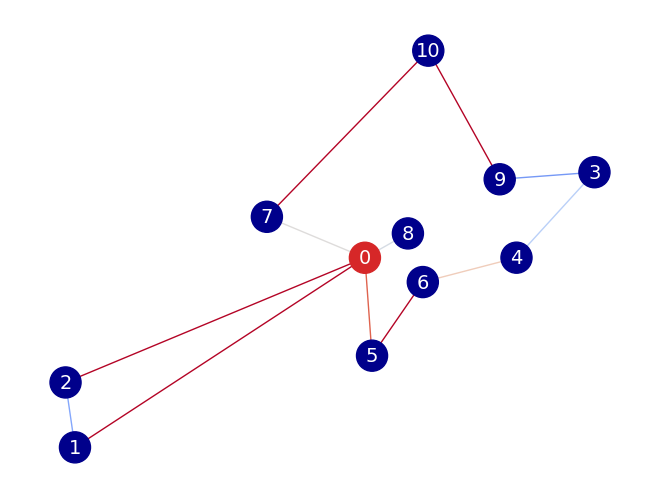

In [13]:
solution_cplex = sol.raw_results.as_name_dict()
G_sol = nx.Graph()
G_sol.add_nodes_from(range(n_companies))
for i in solution_cplex:
    nodes = i[2:].split("_")
    G_sol.add_edge(int(nodes[0]), int(nodes[1]))
nx.draw(G_sol, pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])

## Quantum Solution

Once we have the quadratic program of our model. We can use the qiskit optimization library to translate it into its QUBO representation. In this case, we have inequality constraints that in most cases need extra variables, known as **slack variables**. For this specific case, the number of variables increases from  68 to 196 to represent the inequality constraints.

A further constraint is the number of qubits we can simulate. Unless we have a supercomputer, the best option to simulate the largest qubits number is using **qasm_simulator** from IBM in **runtime mode**. The maximum number of qubits we can simulate using the qasm_simulator is 32. For the case of real devices, we have a similar problem, we can only run experiments on a 7 qubits device (ibm_oslo) and 16 qubits device (ibmq_guadalupe) to which we have access.

Therefore, using the previous solution we can reduce the number of variables choosing the correct set of variables for the **slack variables** and for most of the route connections between companies ij, the variables we will leave are distributed as follows for the three cases analized:

1) Using 7 variables and replace the orhers with the optimal solution. From the vairables left 3 have a optimal solution equal to 1 and 4 equal to 0 (testing local machine and ibm_oslo **runtime**).

2) Using 25 variables and replace the others with the optimal solution. From the vairables left 10 have a optimal solution equal to 1 and 15 equal to 0 (testing qasm_simulator **runtime**).


In [14]:
qubo = QuadraticProgramToQubo(penalty=15).convert(quadratic_program)
num_vars = qubo.get_num_binary_vars()
print(f"To represent the inital problem with {mdl.number_of_binary_variables} variables, the QUBO representation needs {num_vars} variables")

To represent the inital problem with 68 variables, the QUBO representation needs 196 variables


In [15]:
new_qubo = qubo.substitute_variables(sol.variables_dict)

In [16]:
start = time.time()
sol_slack = CplexOptimizer().solve(new_qubo)
end = time.time() - start
print(f"The solver needs {np.round(end, 3)} seconds to finish.")

The solver needs 0.078 seconds to finish.


In [17]:
qubo_no_slack = qubo.substitute_variables(sol_slack.variables_dict)
sol_no_slack = CplexOptimizer().solve(qubo_no_slack)

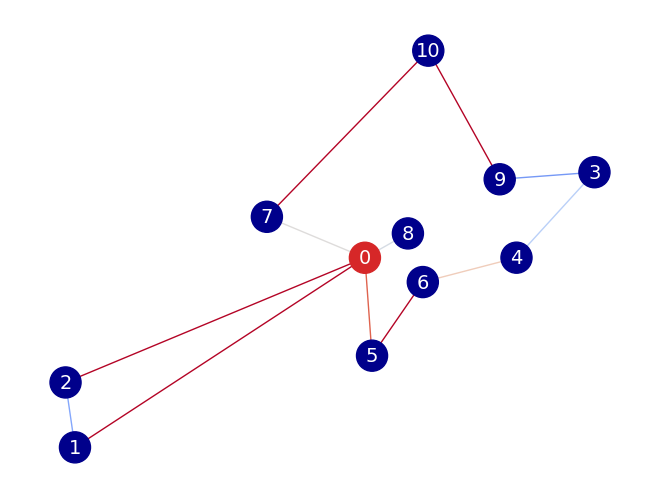

In [18]:
solution_slack = sol_no_slack.raw_results.as_name_dict()
G_sol_slack = nx.Graph()
G_sol_slack.add_nodes_from(range(n_companies))
for i in solution_slack:
    nodes = i[2:].split("_")
    G_sol.add_edge(int(nodes[0]), int(nodes[1]))
nx.draw(G_sol, pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])

In [19]:
index_1s = [k for k, v in sol_no_slack.variables_dict.items() if v == 1]
index_0s = [k for k, v in sol_no_slack.variables_dict.items() if v == 0]

### Useful functions

In [20]:
def Optimization_QAOA(qubo, reps=1, optimizer=COBYLA(maxiter=1000), backend=None,
                      shots=1024, alpha=1.0, provider=None, local=False, error_mitigation=False):
    intermediate_info = {'nfev': [],
                         'parameters': [],
                         'stddev': [],
                         'mean': []
                             }

    def callback(nfev, parameters, mean, stddev):
#         display(f"Evaluation: {nfev}, Energy: {mean}, Std: {stddev}")
        intermediate_info['nfev'].append(nfev)
        intermediate_info['parameters'].append(parameters)
        intermediate_info['mean'].append(mean)
        intermediate_info['stddev'].append(stddev)

    if local:
        qaoa_mes = QAOA(optimizer=optimizer, reps=reps, quantum_instance=AerSimulator(),
                        callback=callback)
    else:
        qaoa_mes = QAOAClient(provider=provider, backend=backend, reps=reps, alpha=alpha,
                             shots=shots, callback=callback, optimizer=optimizer,
                             optimization_level=3,measurement_error_mitigation=error_mitigation)
    qaoa = MinimumEigenOptimizer(qaoa_mes)
    result = qaoa.solve(qubo)
    return result, intermediate_info

In [21]:
def Optimization_VQE(qubo, ansatz, optimizer=SPSA(maxiter=50), backend=None,
                     shots=1024, provider=None, local=False, error_mitigation=False):

    intermediate_info = {'nfev': [],
                         'parameters': [],
                         'stddev': [],
                         'mean': []
                         }

    def callback(nfev, parameters, mean, stddev):
#         display(f"Evaluation: {nfev}, Energy: {mean}, Std: {stddev}")
        intermediate_info['nfev'].append(nfev)
        intermediate_info['parameters'].append(parameters)
        intermediate_info['mean'].append(mean)
        intermediate_info['stddev'].append(stddev)

    if local:
        vqe_mes = VQE(ansatz=ansatz, quantum_instance=AerSimulator(),
                        callback=callback, optimizer=optimizer)
    else:
        vqe_mes = VQEClient(ansatz=ansatz, provider=provider, backend=backend, shots=shots,
                        callback=callback, optimizer=optimizer,measurement_error_mitigation=error_mitigation)
    vqe = MinimumEigenOptimizer(vqe_mes)
    result = vqe.solve(qubo)
    return result, intermediate_info

In [22]:
def graph(solution, solution_not_kept):
    G = nx.Graph()
    G.add_nodes_from(range(n_companies))
    for k, v in solution.items():
        if v == 1:
            nodes = k[2:].split("_")
            G.add_edge(int(nodes[0]), int(nodes[1]))
    for k, v in solution_not_kept.items():
        if v == 1:
            nodes = k[2:].split("_")
            G.add_edge(int(nodes[0]), int(nodes[1]))
    return G

## Solution of the 7 variables with qiskit runtime and local machine

We tested different models to see the applicability of the current model with ideal solutions using two classical optimizer ([SPSA](https://en.wikipedia.org/wiki/Simultaneous_perturbation_stochastic_approximation) and [COBYLA](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html#:~:text=COBYLA%20is%20a%20numerical%20optimization,scipy.optimize.minimize%20COBYLA.)) for two quantum algorithms ([QAOA](https://qiskit.org/textbook/ch-applications/qaoa.html) with 2 layer repetitions and [VQE](https://pennylane.ai/qml/demos/tutorial_vqe.html) with ansatz [TwoLocal](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html), number of shots=1024 for both cases). Additionally, we run our model in *ibm_lagos* using [qiskit runtime](https://quantum-computing.ibm.com/lab/docs/iql/runtime/) with a mitigated and unmitigated results with the same settings. The figure below shows the results for the different cases, we see that all the simulations reach the ideal solution shown in the graphs of the left, while the solution for the oslo and lagos simulations do not reach the optimal point.

In [23]:
num_1s = 3
num_0s = 4
random.seed(1)
keep_1s = random.sample(index_1s, num_1s)
keep_0s = random.sample(index_0s, num_0s)
sol_qubo = sol.variables_dict
solution_not_kept7 = {i:sol_qubo[i] for i in sol_qubo.keys() if i not in keep_1s + keep_0s}

qubo_7vars = qubo_no_slack.substitute_variables(solution_not_kept7)

In [24]:
print(qubo_7vars.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: VRP

Minimize
 obj: - 28.832732659039 x_0_2 - 59.526572232279 x_0_5 - 29.773713802415 x_0_6
      - 119.218955212750 x_3_6 - 629.665666916984 x_6_4 - 329.617335307817 x_9_4
      - 119.201513758697 x_9_7 + [ 60 x_0_2^2 + 60 x_0_2*x_0_5 + 60 x_0_2*x_0_6
      + 60 x_0_5^2 + 60 x_0_5*x_0_6 + 60 x_0_6^2 + 60 x_0_6*x_3_6 + 270 x_3_6^2
      + 240 x_3_6*x_6_4 + 120 x_3_6*x_9_4 + 630 x_6_4^2 + 660 x_6_4*x_9_4
      + 240 x_6_4*x_9_7 + 630 x_9_4^2 + 540 x_9_4*x_9_7 + 570 x_9_7^2 ]/2 +
      351.400450155659
Subject To

Bounds
 0 <= x_0_2 <= 1
 0 <= x_0_5 <= 1
 0 <= x_0_6 <= 1
 0 <= x_3_6 <= 1
 0 <= x_6_4 <= 1
 0 <= x_9_4 <= 1
 0 <= x_9_7 <= 1

Binaries
 x_0_2 x_0_5 x_0_6 x_3_6 x_6_4 x_9_4 x_9_7
End



### Solving using QAOA with COBYLA and SPSA

In [39]:
sol7_local_qaoa_cobyla = Optimization_QAOA(qubo_7vars, reps=2, optimizer=COBYLA(maxiter=200), local=True)
sol7_local_qaoa_spsa = Optimization_QAOA(qubo_7vars, reps=2, optimizer=SPSA(maxiter=200), local=True)

<ipython-input-20-6748a3fe3eb0>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa_mes = QAOA(optimizer=optimizer, reps=reps, quantum_instance=AerSimulator(),
<ipython-input-20-6748a3fe3eb0>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa_mes = QAOA(optimizer=optimizer, reps=reps, quantum_instance=AerSimulator(),


In [44]:
!pip install qiskit-ibm-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 5.9 MB/s eta 0:00:00


In [45]:
from qiskit_ibm_provider import IBMProvider

In [49]:
IBMProvider.save_account(token="4e7a62ef6f6888fb9684691dc3e892720ad0e19f0cefba4f386653613d1002d55ff8642ac08cb57b25f75329bfe39d2b57b79391a9f89beea2dbed5c5e5a2c4f")

In [55]:
provider2 = IBMProvider()

# Select a different hub/group/project.
provider2 = IBMProvider(instance="ibm-q/open/main")

In [56]:
provider2.backends()

[<IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_jakarta')>]

In [60]:
backen = provider.get_backend("ibmq_qasm_simulator")

In [62]:
sol7_oslo_qaoa_cobyla = Optimization_QAOA(qubo_7vars, reps=2, local=False, backend= backen.run(),
                                       provider=provider2, optimizer=COBYLA(maxiter=50))

TypeError: ignored

In [26]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-community', group='cdl-hackathon', project='main')
provider2 = IBMQ.get_provider(hub='ibm-q-research', group='guanajuato-1', project='main')

MissingOptionalLibraryError: ignored

In [ ]:
sol7_oslo_qaoa_spsa = Optimization_QAOA(qubo_7vars, reps=2, local=False, backend=provider2.backend.ibm_oslo,
                                       provider=provider2, optimizer=SPSA(maxiter=50))

In [ ]:
sol7_oslo_qaoa_spsa_mitig = Optimization_QAOA(qubo_7vars, reps=2, local=False, backend=provider2.backend.ibm_oslo,
                                       provider=provider2, optimizer=SPSA(maxiter=50), error_mitigation=True)

### Solving using VQE and COBYLA- SPSA

In [27]:
ansatz = TwoLocal(qubo_7vars.get_num_vars(), rotation_blocks='ry', entanglement_blocks='cz')

In [28]:
sol7_local_vqe_spsa = Optimization_VQE(qubo_7vars, ansatz, local=True, optimizer=SPSA(maxiter=200))
sol7_local_vqe_cobyla = Optimization_VQE(qubo_7vars, ansatz, local=True, optimizer=COBYLA(maxiter=200))

<ipython-input-21-8c164ea6e6e5>:18: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe_mes = VQE(ansatz=ansatz, quantum_instance=AerSimulator(),
<ipython-input-21-8c164ea6e6e5>:18: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe_mes = VQE(ansatz=ansatz, quantum_instance=AerSimulator(),


In [ ]:
sol7_lagos_vqe_cobyla = Optimization_VQE(qubo_7vars, ansatz, local=False, optimizer=COBYLA(maxiter=100),
                                 backend=provider2.backend.ibm_lagos, provider=provider2)

In [ ]:
sol7_lagos_vqe_spsa = Optimization_VQE(qubo_7vars, ansatz, local=False, optimizer=SPSA(maxiter=25),
                                 backend=provider2.backend.ibm_lagos, provider=provider2)

In [ ]:
sol7_lagos_vqe_spsa2 = Optimization_VQE(qubo_7vars, ansatz, local=False, optimizer=SPSA(maxiter=25),
                                 backend=provider2.backend.ibm_lagos, provider=provider2, error_mitigation=True)

## 7Qubits results of the simulations and Real Devices.

In [29]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

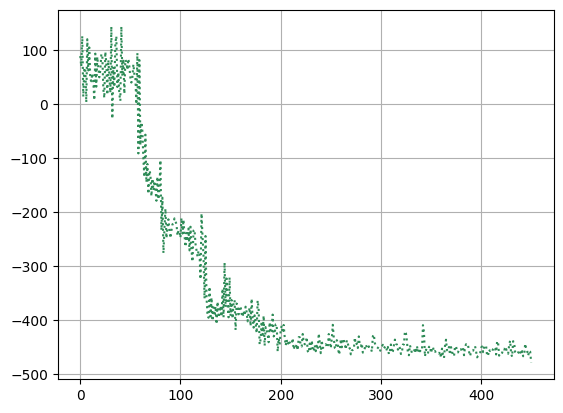

In [32]:
plt.figure()
plt.plot(sol7_local_vqe_spsa[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
# plt.plot(sol7_local_vqe_cobyla[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
# plt.plot(sol7_local_qaoa_cobyla[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
# plt.plot(sol7_local_qaoa_spsa[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
plt.grid()


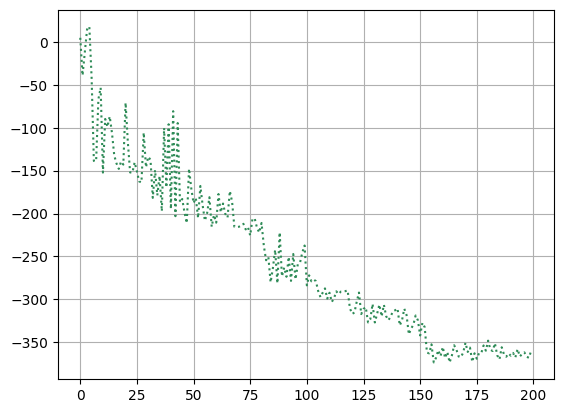

In [36]:
plt.plot(sol7_local_vqe_cobyla[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
plt.grid()

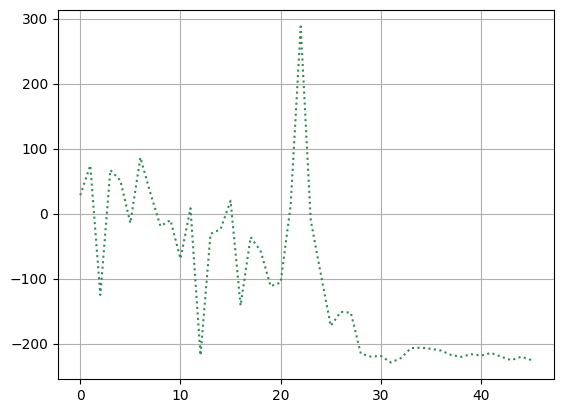

In [40]:
plt.plot(sol7_local_qaoa_cobyla[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
plt.grid()

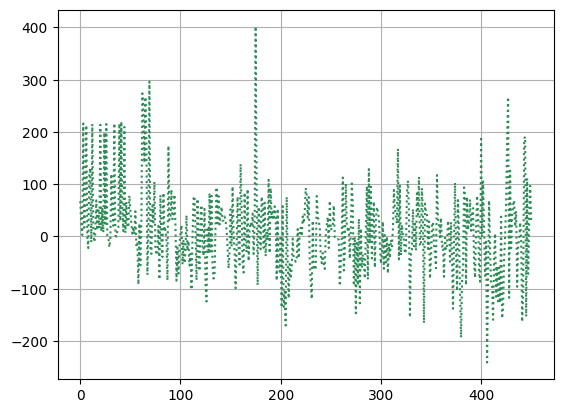

In [41]:
plt.plot(sol7_local_qaoa_spsa[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
plt.grid()

In [ ]:
plt.figure()
plt.plot(sol7_lagos_vqe_spsa[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
plt.plot(sol7_lagos_vqe_spsa2[1]["mean"], linestyle="-.", color="indigo", label="VQE-Lagos-SPSA-Mitig")
plt.plot(sol7_lagos_vqe_cobyla[1]["mean"], color="olive", label="VQE-Lagos-COBYLA-Mitig")
plt.grid()
plt.savefig("./Images/inset.png")

In [ ]:
plt.figure()
plt.plot(sol7_oslo_qaoa_spsa[1]["mean"], linestyle=":", color="seagreen", label="QAOA-Oslo-SPSA")
plt.plot(sol7_oslo_qaoa_cobyla[1]["mean"], color="olive", label="QAOA-Oslo-COBYLA")
plt.grid()
plt.savefig("./Images/inset2.png")

In [ ]:
sol7 = {"local_qaoa_cobyla":sol7_local_qaoa_cobyla, "local_vqe_cobyla":sol7_local_vqe_cobyla,
       "local_qaoa_spsa":sol7_local_qaoa_spsa, "local_vqe_spsa":sol7_local_vqe_spsa,
       "oslo_qaoa_cobyla":sol7_oslo_qaoa_cobyla, "oslo_qaoa_spsa":sol7_oslo_qaoa_spsa,
       "lagos_vqe_spsa":sol7_lagos_vqe_spsa, "lagos_vqe_cobyla_mitig":sol7_lagos_vqe_cobyla}
np.save("./Data/sol7.npy", sol7)

In [ ]:
sol7 = [sol7_local_qaoa_cobyla, sol7_local_vqe_cobyla, sol7_local_qaoa_spsa, sol7_local_vqe_spsa]
q_alg = ["QAOA", "VQE"]
fig, ax = plt.subplots(3,2, figsize=(15,18))
ax[0,0].plot(sol7_local_qaoa_cobyla[1]["mean"], color="darkblue", label="QAOA-COBYLA")
ax[0,0].plot(sol7_local_qaoa_spsa[1]["mean"], linestyle="--", color="lightcoral", label="QAOA-SPSA")
ax[0,0].plot(sol7_oslo_qaoa_spsa[1]["mean"], linestyle=":", color="seagreen", label="QAOA-Oslo-SPSA")
ax[0,0].plot(sol7_oslo_qaoa_cobyla[1]["mean"], color="olive", label="QAOA-Oslo-COBYLA")

ax[0,1].plot(sol7_local_vqe_cobyla[1]["mean"], color="darkblue", label="VQE-COBYLA")
ax[0,1].plot(sol7_local_vqe_spsa[1]["mean"], linestyle="--", color="lightcoral", label="VQE-SPSA")
ax[0,1].plot(sol7_lagos_vqe_spsa[1]["mean"], linestyle=":", color="seagreen", label="VQE-Lagos-SPSA")
ax[0,1].plot(sol7_lagos_vqe_spsa2[1]["mean"], linestyle="-.", color="indigo", label="VQE-Lagos-SPSA-Mitig")
ax[0,1].plot(sol7_lagos_vqe_cobyla[1]["mean"], color="olive", label="VQE-Lagos-COBYLA-Mitig")

for i in range(2):
    ax[0,i].set_xlabel("Iterations", fontsize=14)
    ax[0,i].set_ylabel("Cost", fontsize=14)
    ax[0,i].legend()
    ax[0,i].grid()
    plt.sca(ax[1,i])
    nx.draw(graph(sol7[i][0].variables_dict,solution_not_kept7), pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])
    ax[1,i].set_title(f"{q_alg[i]}-COBYLA", fontsize=14)
    plt.sca(ax[2,i])
    nx.draw(graph(sol7[i+2][0].variables_dict,solution_not_kept7), pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])
    ax[2,i].set_title(f"{q_alg[i]}-SPSA", fontsize=14)

plt.savefig("./Images/Sol7Q.png")

## Solution of the 15 variables with qiskit runtime on qasm_simulator

For the case of 15 qubits, the solution includes only QAOA (with 3 layers repetitions) and VQE (with [TwoLocal ansatz](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html)) with the classic optimizer COBYLA. The results were obtained from qiskit runtime and the ideal simulator ibmq_qasm_simulator. As it is shown in the figure below the QAOA algorithm do not reach the solution while VQE can reach it.


In [42]:
num_1s = 5
num_0s = 10
random.seed(1)
keep_1s = random.sample(index_1s, num_1s)
keep_0s = random.sample(index_0s, num_0s)
sol_qubo = sol.variables_dict
solution_not_kept = {i:sol_qubo[i] for i in sol_qubo.keys() if i not in keep_1s + keep_0s}

qubo_15vars = qubo_no_slack.substitute_variables(solution_not_kept)

In [43]:
sol15_qasm_qaoa_cobyla = Optimization_QAOA(qubo_15vars, reps=3, local=False, backend=provider2.backend.ibmq_qasm_simulator,
                                       provider=provider2, optimizer=COBYLA(maxiter=100))

NameError: ignored

In [ ]:
solution15_qaoa =  sol15_qasm_qaoa_cobyla[0].variables_dict
G_sol15_qaoa = nx.Graph()
G_sol15_qaoa.add_nodes_from(range(n_companies))
for k, v in solution15_qaoa.items():
    if v == 1:
        nodes = k[2:].split("_")
        G_sol15_qaoa.add_edge(int(nodes[0]), int(nodes[1]))
for k, v in solution_not_kept.items():
    if v == 1:
        nodes = k[2:].split("_")
        G_sol15_qaoa.add_edge(int(nodes[0]), int(nodes[1]))
nx.draw(G_sol15_qaoa, pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])

In [ ]:
sol15_qasm_qaoa_spsa = Optimization_QAOA(qubo_15vars, reps=3, local=False, backend=provider2.backend.ibmq_qasm_simulator,
                                       provider=provider2, optimizer=SPSA(maxiter=25))

In [ ]:
ansatz15 = TwoLocal(qubo_15vars.get_num_vars(), rotation_blocks='ry', entanglement_blocks='cz')
sol15_qasm_vqe_cobyla = Optimization_VQE(qubo_15vars,ansatz=ansatz15, local=False, backend=provider2.backend.ibmq_qasm_simulator,
                                       provider=provider2, optimizer=COBYLA(maxiter=100))

In [ ]:
solution15_vqe =  sol15_qasm_vqe_cobyla[0].variables_dict
G_sol15_vqe = nx.Graph()
G_sol15_vqe.add_nodes_from(range(n_companies))
for k, v in solution15_vqe.items():
    if v == 1:
        nodes = k[2:].split("_")
        G_sol15_vqe.add_edge(int(nodes[0]), int(nodes[1]))
for k, v in solution_not_kept.items():
    if v == 1:
        nodes = k[2:].split("_")
        G_sol15_vqe.add_edge(int(nodes[0]), int(nodes[1]))
nx.draw(G_sol15_vqe, pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])

In [ ]:
sol15_qasm = {"qaoa_cobyla":sol15_qasm_qaoa_cobyla, "vqe_cobyla":sol15_qasm_vqe_cobyla}
np.save("./Data/sol15_qasm.npy", sol15_qasm)

In [ ]:
solution15 = [G_sol15_qaoa, G_sol15_vqe]
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].plot(sol15_qasm_qaoa_cobyla[1]["mean"], color="darkblue", label="QAOA-COBYLA")
ax[0,1].plot(sol15_qasm_vqe_cobyla[1]["mean"], color="slateblue", label="VQE-COBYLA")
for i in range(2):
    ax[0,i].grid()
    ax[0,i].set_xlabel("Iterations", fontsize=14)
    ax[0,i].set_ylabel("Cost", fontsize=14)
    ax[0,i].legend()
    plt.sca(ax[1,i])
    nx.draw(solution15[i], pos=companies, with_labels=True, node_size=500,
        edge_color=colors, width=1, font_color="white",font_size=14,
        node_color = ["tab:red"] + (n_companies-1)*["darkblue"])
fig.savefig("./Images/Sol15Q.png")

## Solution with 20 variables

In [ ]:
num_1s = 8
num_0s = 12
random.seed(1)
keep_1s = random.sample(index_1s, num_1s)
keep_0s = random.sample(index_0s, num_0s)
sol_qubo = sol.variables_dict
solution_not_kept = {i:sol_qubo[i] for i in sol_qubo.keys() if i not in keep_1s + keep_0s}

qubo_20vars = qubo_no_slack.substitute_variables(solution_not_kept)

In [ ]:
sol20_qasm_qaoa_cobyla_r1 = Optimization_QAOA(qubo_20vars, reps=1, local=False, backend=provider2.backend.ibmq_qasm_simulator,
                                       provider=provider2, optimizer=COBYLA(maxiter=10))